# Veteran Suicide Prevention - Preprocessing & Exploration Scratchpad

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.impute
from sklearn.model_selection import train_test_split

from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

import suicide_acquire


In [2]:
age_adjusted_df = suicide_acquire.age_adjusted()

age_adjusted_df.head()

Age-Adjusted Veteran Suicide Rate DF
Consists of 13 rows and 10 columns


,year,total_vet_suicides,est_total_vet_pop,age_adjusted_rate_per_100K,male_suicides,est_male_vet_pop,male_age_adjusted_rate_per_100K,female_suicides,est_female_vet_pop,female_age_adjusted_rate_per_100K
4,2005,5787,24240000,25.5,5610,22501000,27.3,177,1739000,10.4
5,2006,5688,23731000,24.8,5527,21992000,26.8,161,1739000,9.2
6,2007,5893,23291000,26.5,5724,21588000,28.7,169,1703000,9.7
7,2008,6216,22996000,28.4,6024,21322000,30.8,192,1674000,11.3
8,2009,6172,22603000,28.3,5968,20917000,30.4,204,1686000,12.2


In [3]:
age_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 16
Data columns (total 10 columns):
year                                 13 non-null int64
total_vet_suicides                   13 non-null int64
est_total_vet_pop                    13 non-null int64
age_adjusted_rate_per_100K           13 non-null float64
male_suicides                        13 non-null int64
est_male_vet_pop                     13 non-null int64
male_age_adjusted_rate_per_100K      13 non-null float64
female_suicides                      13 non-null int64
est_female_vet_pop                   13 non-null int64
female_age_adjusted_rate_per_100K    13 non-null float64
dtypes: float64(3), int64(7)
memory usage: 1.1 KB


**Because we're dealing with discrete variables (definite numbers - no one counted could be considered 'partly' or 'in the process of' suicide; they either committed it or they didn't), we can take a look at the crosstab.**`

In [4]:
age_adjusted_df.index

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [5]:
pd.crosstab(age_adjusted_df.male_age_adjusted_rate_per_100K, age_adjusted_df.year,
            margins=True).style.background_gradient(cmap="RdYlBu")

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
male_age_adjusted_rate_per_100K,,,,,,,,,,,,,,
26.8,0,1,0,0,0,0,0,0,0,0,0,0,0,1
27.3,1,0,0,0,0,0,0,0,0,0,0,0,0,1
28.7,0,0,1,0,0,0,0,0,0,0,0,0,0,1
30.4,0,0,0,0,1,0,0,0,0,0,0,0,0,1
30.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1
31.3,0,0,0,0,0,1,0,0,0,0,0,0,0,1
32.3,0,0,0,0,0,0,1,0,0,0,0,0,0,1
33.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
34.7,0,0,0,0,0,0,0,0,1,0,0,0,0,1


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

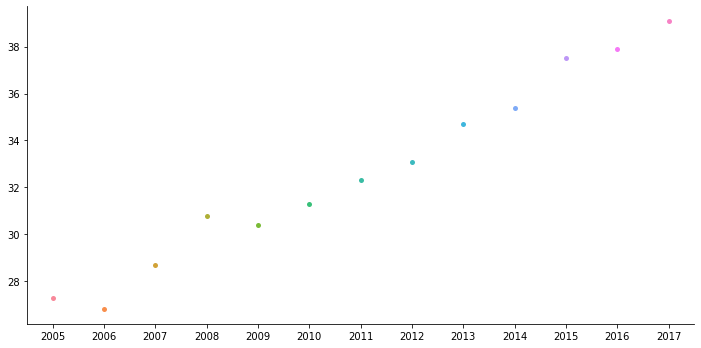

In [6]:
sns.catplot(x=age_adjusted_df.year, y="male_age_adjusted_rate_per_100K", kind="swarm", data=age_adjusted_df, height=5, aspect=2)

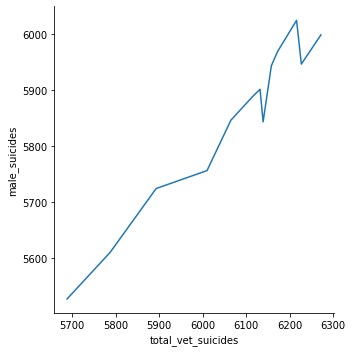

In [7]:
nums = sns.relplot(x="total_vet_suicides", y="male_suicides", kind="line", data=age_adjusted_df);

nums

**^^It appears that as the years go on, the age-adjusted rate of male veteran suicide increases accordingly.**

- But these are just the numbers; what percentage of all veteran suicides are male, and how does that change over time?

In [8]:
# adding column that gives percentage of total suicides that are male

age_adjusted_df["suicide_%_thats_male"] = (age_adjusted_df.male_suicides / age_adjusted_df.total_vet_suicides)*100

In [9]:
age_adjusted_df.head()

,year,total_vet_suicides,est_total_vet_pop,age_adjusted_rate_per_100K,male_suicides,est_male_vet_pop,male_age_adjusted_rate_per_100K,female_suicides,est_female_vet_pop,female_age_adjusted_rate_per_100K,suicide_%_thats_male
4,2005,5787,24240000,25.5,5610,22501000,27.3,177,1739000,10.4,96.941420
5,2006,5688,23731000,24.8,5527,21992000,26.8,161,1739000,9.2,97.169480
6,2007,5893,23291000,26.5,5724,21588000,28.7,169,1703000,9.7,97.132191
7,2008,6216,22996000,28.4,6024,21322000,30.8,192,1674000,11.3,96.911197
8,2009,6172,22603000,28.3,5968,20917000,30.4,204,1686000,12.2,96.694750


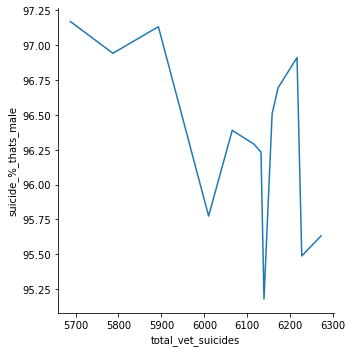

In [14]:
pct = sns.relplot(x="total_vet_suicides", y="suicide_%_thats_male", kind="line", data=age_adjusted_df);

pct

**^^Seems that even though as time moves forward the male veteran suicide numbers increase, the overall percentage of male veteran suicides fluctuates considerably.** 

- So, what do the numbers vs the percentages look like?

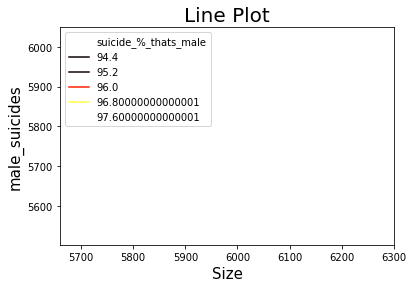

In [24]:
sns.swarmplot(x="pclass", y="age", data=train, hue="survived", palette="Set2")
plt.legend()

**Next, checking to see what female age-adjusted rate looks like:**

In [ ]:
pd.crosstab(age_adjusted_df.female_age_adjusted_rate_per_100K, age_adjusted_df.index,
            margins=True).style.background_gradient(cmap="PuBuGn")

**^^Similarly, female age-adjusted rates increase over time, however, it seems there is more periodic reducition of rates with women.**

In [ ]:
sns.relplot(x="total_vet_suicides", y="female_suicides", kind="line", data=age_adjusted_df);

### Walkthrough of Age-Adjusted Suicide Rates

### The age distribution of a population greatly affects its mortality rate.  In calculating the age-adjusted rate for this project, age groups (18-35, 36-55, etc.) were created and the total number of veterans in those age groups were counted.

Within each age group, the number of suicides were counted, and to get the age-adjusted suicide rate, that number was divided by the total population of that group.  

**For example:**

>You have 100 veterans between the ages of 20 and 25.  Of those 100 veterans, 3 committed suicide.
    
>The age-adjusted suicide rate for that group of 20-25 year-old veterans = 3 / 100 or 3%
    
Again, the purpose of the age-adjusted rate is to narrow down which specific age groups are most prone to committing suicide.  While crude rate helps us understand suicide's devastating effects across the entire veteran population, crude-rate data has been excluded from our datasets in favor of the more specific age-adjusted rate.

In [ ]:
age_group_df = suicide_acquire.age_group_df()

age_group_df.head()

In [ ]:
age_group_df.info()

In [ ]:
# age_group_df = age_group_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
age_group_df.info()

In [ ]:
recent_vha_user_df = suicide_acquire.recent_vha_user()

recent_vha_user_df.head()

In [ ]:
recent_vha_user_df.info()

In [ ]:
vha_by_age_group_df = suicide_acquire.vha_by_age_group()

vha_by_age_group_df.head()

In [ ]:
vha_by_age_group_df.info()

In [ ]:
non_vha_user_df = suicide_acquire.non_vha_user()

non_vha_user_df.head()

In [ ]:
non_vha_user_df.info()

In [ ]:
non_vha_by_age_df = suicide_acquire.non_vha_by_age()

non_vha_by_age_df.head()

In [ ]:
non_vha_by_age_df.info()

In [ ]:
pd.crosstab(non_vha_by_age_df.non_vha_veteran_crude_per_100K, age_adjusted_df.year,
            margins=True).style.background_gradient(cmap="PuBuGn")

### Preprocessing functions that follow:

- Based on the similar division of the datasets into train, validate, and test portions, the 'behind the scenes' work of the preprocessing the datasets for exploration takes place in the accompanying '